### DataFrames

- Zaawansowany pakiet do działania na tabelkach nxm danych 
- Podobne do pandas DataFrames w Pythonie albo data.frame w R
- Specjalistyczne funkcje do statystyki
- należy zaistalować pakiety:

```julia
Pkg.add("DataFrames")
Pkg.add("DataArrays")
```

- DataFrame to rodzaj bazy danych in-memory
- Składa się z kolumn, do których odwołujemy się używając symboli
- Każda z kolumn jest typu DataArrays, który jest  parametryzowany typem przechowywanym w tej kolumnie 
- typ ten może być inny w każdej kolumnie (inaczej niż w dwuwymiarowych tablicach )
- strona pakietu: https://github.com/JuliaData/DataFrames.jl
- dokumentacja https://juliadata.github.io/DataFrames.jl/stable/

In [3]:
# wsparcie dla nieistniejących wartości - NA
# wartość NA, typ NAtype

using DataArrays 
using DataFrames
dv=@data([7,3,NA,5,42])


5-element DataArrays.DataArray{Int64,1}:
  7  
  3  
   NA
  5  
 42  

In [4]:
# funkcja drop NA czyli dropna()
sum(dropna(dv))

57

In [5]:
using DataFrames
df1=DataFrame()
df1[:MojaKolumna]= 1:4
df1[:Col2]= [e,pi,sqrt(2), 42]
df1[:Col3]= [true,false, true, false]
show(df1)

4×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 1           │ 2.71828 │ true  │
│ 2   │ 2           │ 3.14159 │ false │
│ 3   │ 3           │ 1.41421 │ true  │
│ 4   │ 4           │ 42.0    │ false │

In [6]:
typeof(df1[:Col3])

DataArrays.DataArray{Bool,1}

In [7]:
# możemy też utworzyć DataFrame używając konstruktora
df2=DataFrame(MojaKolumna=1:10, 
    Col2=[e,pi, sqrt(2), 3, 4,e,pi, sqrt(2), 3, 4], 
    Col3=[true,true,false,true,false,true,true,false,true,false])

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true
7,7,3.141592653589793,true
8,8,1.4142135623730951,false
9,9,3.0,true
10,10,4.0,false


In [8]:
# można odwoływać się po indeksie
show(df2[2])

[2.71828, 3.14159, 1.41421, 3.0, 4.0, 2.71828, 3.14159, 1.41421, 3.0, 4.0]

In [9]:
# albo po symbolu kolumny
show(df2[:Col2])

[2.71828, 3.14159, 1.41421, 3.0, 4.0, 2.71828, 3.14159, 1.41421, 3.0, 4.0]

In [10]:
# wiersze lub podzbiory wierszy i kolumn uzyskujemy poprzez operator (:). Wynikiem jest nowy DataFrame
show(df2[3,:])

1×3 DataFrames.DataFrame
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │

In [11]:
# drugi i trzeci wiersz
df2[2:3, :]

,MojaKolumna,Col2,Col3
1,2,3.141592653589793,true
2,3,1.4142135623730951,false


In [12]:
# druga kolumna drugiego i trzeciego wiersza
df2[2:3, :Col2]

2-element DataArrays.DataArray{Float64,1}:
 3.14159
 1.41421

In [13]:
# druga i trzecia kolumna drugiego i trzeciego wiersza
df2[2:3,[:Col2, :Col3]]

,Col2,Col3
1,3.141592653589793,true
2,1.4142135623730951,false


In [14]:
# pierwsze sześć wierszy
DataFrames.head(df2)

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,3,1.4142135623730951,false
4,4,3.0,true
5,5,4.0,false
6,6,2.718281828459045,true


In [15]:
# ostatnie sześć wierszy
DataFrames.tail(df2)

,MojaKolumna,Col2,Col3
1,5,4.0,false
2,6,2.718281828459045,true
3,7,3.141592653589793,true
4,8,1.4142135623730951,false
5,9,3.0,true
6,10,4.0,false


In [16]:
# nazwy kolumn
names(df2)

3-element Array{Symbol,1}:
 :MojaKolumna
 :Col2       
 :Col3       

In [17]:
# typy kolumn
eltypes(df2)

3-element Array{Type,1}:
 Int64  
 Float64
 Bool   

In [18]:
# podstawowe dane statystyczne o wartościach w kolumnie
describe(df2)

MojaKolumna
Summary Stats:
Mean:           5.500000
Minimum:        1.000000
1st Quartile:   3.250000
Median:         5.500000
3rd Quartile:   7.750000
Maximum:        10.000000
Length:         10
Type:           Int64
Number Missing: 0
% Missing:      0.000000

Col2
Summary Stats:
Mean:           2.854818
Minimum:        1.414214
1st Quartile:   2.718282
Median:         3.000000
3rd Quartile:   3.141593
Maximum:        4.000000
Length:         10
Type:           Float64
Number Missing: 0
% Missing:      0.000000

Col3
Summary Stats:
Mean:           0.600000
Minimum:        0.000000
1st Quartile:   0.000000
Median:         1.000000
3rd Quartile:   1.000000
Maximum:        1.000000
Length:         10
Type:           Bool
Number Missing: 0
% Missing:      0.000000



In [19]:
mean(df2[:MojaKolumna])

5.5

In [20]:
std(df2[:MojaKolumna])

3.0276503540974917

In [21]:
# posortowane wartości w kolumnie Col2 (bez powtórzeń)
sort(unique(df2[:Col2]))

5-element DataArrays.DataArray{Float64,1}:
 1.41421
 2.71828
 3.0    
 3.14159
 4.0    

In [22]:
# zwraca tablice typu Boolean  w zależności od spełnianego warunku
df2[:Col3] .== true

10-element DataArrays.DataArray{Bool,1}:
  true
  true
 false
  true
 false
  true
  true
 false
  true
 false

In [23]:
#Zwraca podzbiór dla wierszy spełniających warunek
df2[df2[:Col3] .== true, :]

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,4,3.0,true
4,6,2.718281828459045,true
5,7,3.141592653589793,true
6,9,3.0,true


In [24]:
# grupowanie wierszy (tutaj po wartosci Col3)
# ostatni argument to funkcja albo wyrażenie 
by(df2, :Col3, x->x)

,Col3,MojaKolumna,Col2,Col3_1
1,false,3,1.4142135623730951,false
2,false,5,4.0,false
3,false,8,1.4142135623730951,false
4,false,10,4.0,false
5,true,1,2.718281828459045,true
6,true,2,3.141592653589793,true
7,true,4,3.0,true
8,true,6,2.718281828459045,true
9,true,7,3.141592653589793,true
10,true,9,3.0,true


In [25]:
# zliczanie ilosci wierszy pogrupowanych po wartosci kolumny Col3
by(df2, :Col3, x->size(x,1))

,Col3,x1
1,false,4
2,true,6


In [26]:
# dzielenie jednego DataFrame na mniejsze grupy wg zawartości jednego z pól
gdf=groupby(df2, [:Col3])

DataFrames.GroupedDataFrame  2 groups with keys: Symbol[:Col3]
First Group:
4×3 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ MojaKolumna │ Col2    │ Col3  │
├─────┼─────────────┼─────────┼───────┤
│ 1   │ 3           │ 1.41421 │ false │
│ 2   │ 5           │ 4.0     │ false │
│ 3   │ 8           │ 1.41421 │ false │
│ 4   │ 10          │ 4.0     │ false │
⋮
Last Group:
6×3 DataFrames.SubDataFrame{Array{Int64,1}}
│ Row │ MojaKolumna │ Col2    │ Col3 │
├─────┼─────────────┼─────────┼──────┤
│ 1   │ 1           │ 2.71828 │ true │
│ 2   │ 2           │ 3.14159 │ true │
│ 3   │ 4           │ 3.0     │ true │
│ 4   │ 6           │ 2.71828 │ true │
│ 5   │ 7           │ 3.14159 │ true │
│ 6   │ 9           │ 3.0     │ true │

In [27]:
#pierwsza grupa
gdf[1]

,MojaKolumna,Col2,Col3
1,3,1.4142135623730951,false
2,5,4.0,false
3,8,1.4142135623730951,false
4,10,4.0,false


In [28]:
# druga grupa 
gdf[2]

,MojaKolumna,Col2,Col3
1,1,2.718281828459045,true
2,2,3.141592653589793,true
3,4,3.0,true
4,6,2.718281828459045,true
5,7,3.141592653589793,true
6,9,3.0,true


In [29]:
using  DataFrames
df4=readtable("medical2.csv")
print("size is ", size(df4))
df4[1:20, 1:size(df4,2)]

size is (99, 7)

,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,1,39,106.0,70.0,0,26.97
2,1,2,46,121.0,81.0,0,28.73
3,2,1,48,127.5,80.0,1,25.34
4,3,2,61,150.0,95.0,1,28.58
5,4,2,46,130.0,84.0,1,23.1
6,5,2,43,180.0,110.0,0,30.3
7,6,2,63,138.0,71.0,0,33.11
8,7,2,45,100.0,71.0,1,21.68
9,8,1,52,141.5,89.0,0,26.36
10,9,1,43,162.0,107.0,1,23.61


In [30]:
df5=by(df4, :Wiek,  df->DataFrame(Średnia_sBP=mean(df[:sBP]), Odchylenie_sBP=std(df[:sBP])))


,Wiek,Średnia_sBP,Odchylenie_sBP
1,35,132.5,0.7071067811865476
2,36,107.0,5.228129047119374
3,37,125.0,0.7071067811865476
4,38,131.5,10.408329997330663
5,39,110.5,4.654746681256314
6,40,125.5,0.7071067811865476
7,41,128.83333333333334,8.328665359267754
8,42,131.0,25.987176324743967
9,43,138.5,25.555643390275055
10,44,138.0,0.7071067811865476


In [31]:
# to samo, za pomocą bloku 'do'
by(df4, :Wiek) do df
   DataFrame(m = mean(df[:sBP]), s = std(df[:sBP]))
end

,Wiek,m,s
1,35,132.5,0.7071067811865476
2,36,107.0,5.228129047119374
3,37,125.0,0.7071067811865476
4,38,131.5,10.408329997330663
5,39,110.5,4.654746681256314
6,40,125.5,0.7071067811865476
7,41,128.83333333333334,8.328665359267754
8,42,131.0,25.987176324743967
9,43,138.5,25.555643390275055
10,44,138.0,0.7071067811865476


In [32]:
# funkcja aggregate
aggregate(df4, :Płeć, [sum, mean])

,Płeć,Numer_sum,Numer_mean,Wiek_sum,Wiek_mean,sBP_sum,sBP_mean,dBP_sum,dBP_mean,Drink_sum,Drink_mean,BMI_sum,BMI_mean
1,1,2179,50.674418604651166,1994,46.372093023255815,5653.0,131.46511627906978,3679.5,85.56976744186046,23,0.5348837209302325,1163.25,27.052325581395348
2,2,2672,47.714285714285715,2746,49.035714285714285,7627.0,136.19642857142858,4778.0,85.32142857142857,24,0.42857142857142855,1499.5800000000002,26.778214285714288


In [33]:
# funkcja wykonywana na każdym elemencie kolumny
df4[:Płeć]= ifelse.(df4[:Płeć].==1, "M", "K")
df4[:Drink]= ifelse.(df4[:Drink].==1, "T", "N")
df4[1:3, 1:size(df4,2)]


,Numer,Płeć,Wiek,sBP,dBP,Drink,BMI
1,0,M,39,106.0,70.0,N,26.97
2,1,K,46,121.0,81.0,N,28.73
3,2,M,48,127.5,80.0,T,25.34



### Graficzna reprezentacja DataFrames

Do wyświetlania danych statystycznych dobrym wyborem jest pakiet Gadfly  

```julia
Pkg.add("Gadfly")
```
W razie ostrzeżeń o użyciu przestarzałego kodu spróbować:
```julia
Pkg.update()
```

- koncepcja wzięta z pakietu ggplot2 dla języka R 
- bazuje na książce Leland Wilkinson's "The Grammar of Graphics".
- http://gadflyjl.org/stable/index.html

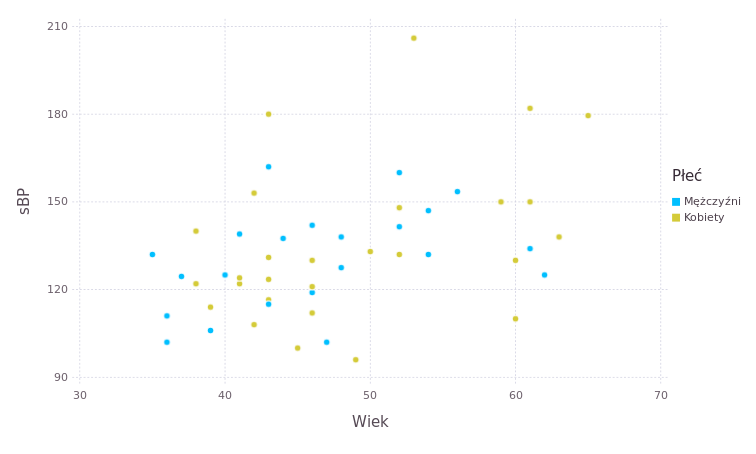

In [34]:
# wykres skórczowego ciśnienia krwi - systolic blood preassure (sBP)
# dla pierwszych 50 wierszy
# w zależności od wieku
# z podziałem wg płci
# 
using Gadfly
set_default_plot_size(20cm, 12cm)
df6=readtable("medical2.csv")
df6[:Płeć]= ifelse.(df6[:Płeć].==1, "Mężczyźni", "Kobiety")


plot(df6[1:50,:], x="Wiek", y="sBP", color="Płeć")


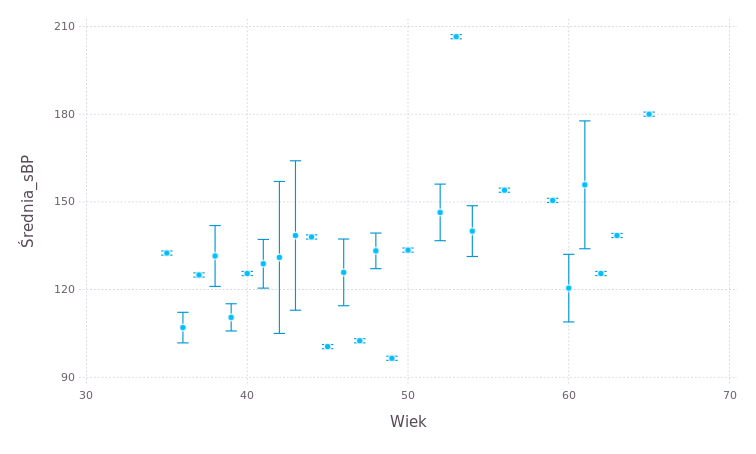

In [35]:

plot(df5,x=:Wiek, y=:Średnia_sBP, ymin=df5[:Średnia_sBP]-df5[:Odchylenie_sBP], ymax=df5[:Średnia_sBP]+df5[:Odchylenie_sBP],
     Geom.point, Geom.errorbar)

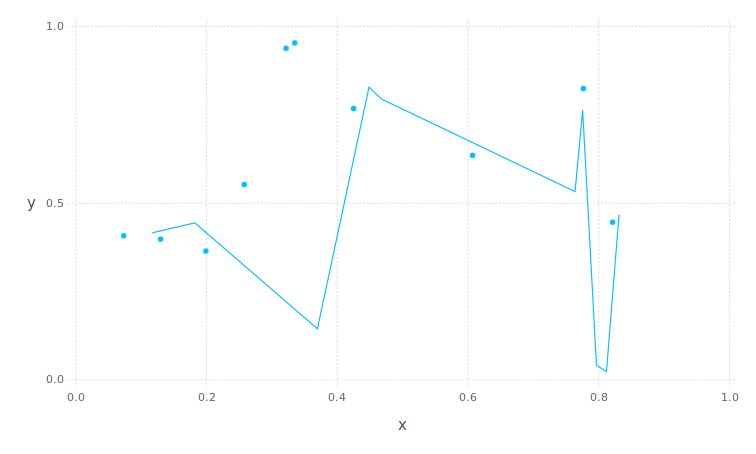

In [36]:
# kilka zależności na jednym wykresie:
#http://gadflyjl.org/stable/man/layers.html
plot(layer(x=rand(10), y=rand(10), Geom.point),
     layer(x=rand(10), y=rand(10), Geom.line))

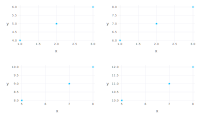

In [37]:
# układanie wykresów w "tabelki" wykresów

p1 = plot(x=[1,2,3], y=[4,5,6])
p2 = plot(x=[1,2,3], y=[6,7,8])
vstack(p1,p2)

p3 = plot(x=[5,7,8], y=[8,9,10])
p4 = plot(x=[5,7,8], y=[10,11,12])

# to jest to samo
vstack(hstack(p1,p2),hstack(p3,p4))
gridstack([p1 p2; p3 p4])



### Zadanie 
- Napisać program w języku C używającego  interfejsu GSL do BLAS:<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_ddot"> funkcji gsl_blas_ddot </a> (mnożenie dwóch wektorów) i 
<a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#c.gsl_blas_dgemv">gsl_blas_dgemv</a> (mnożenie macierzy przez wektor). <a href="https://www.gnu.org/software/gsl/doc/html/blas.html?highlight=blas#examples"> Przykłady użycia.</a>
- Uruchomić i zmierzyć czasy działania obydwu funkcji - każdej dla różnych rozmiarów wektorów.  Dokonać 10 pomiarów dla każdego rozmiaru wektora.
- Czasy działania powinny  być zapisywane do pliku CSV. Należy zaplanować odpowiednią strukturę kolumn takiego pliku.
- Wczytać dane z w/w pliku do jednego DataFrame w języku Julia. 
- Korzystająć z mechanizmów DataFrame w języku Julia obliczyć średnią i odchylenie standardowe, w taki sposób, aby narysować wykresy średnich czasów obliczenia operacji BLAS w zależności od rozmiaru wektora (macierzy) osobno dla poziomu 1 i poziomu 2. Dodać słupki błędów do obydwu wykresów uzyskanych z obliczenia odchylenia standardowego. Wykresy rozmieścić używająć <i>hstack</i> bądź <i>vstack</i>. 
- Należy zadbać o staranne podpisanie osi i wykresów.

In [38]:
using  DataFrames
using Gadfly

resultTable = readtable("wyniki.csv")

,typ,rozmiar,czas
1,ddot,100,2.0e-6
2,dgemv,100,5.0e-5
3,ddot,100,1.0e-6
4,dgemv,100,1.7e-5
5,ddot,100,1.0e-6
6,dgemv,100,1.2e-5
7,ddot,100,0.0
8,dgemv,100,1.1e-5
9,ddot,100,1.0e-6
10,dgemv,100,1.2e-5


In [39]:
# create groups by type -> first level and second level
types=groupby(resultTable, [:typ])
theme = Theme(
    panel_fill="white",
    default_color="blue",
    background_color="white"
)

# find average time and standard deviation for each size in the table
first_level = by(types[1], :rozmiar,  df->DataFrame(średni_czas = mean(df[:czas]), odchylenie_czasu = std(df[:czas])))
second_level = by(types[2], :rozmiar, df->DataFrame(średni_czas = mean(df[:czas]), odchylenie_czasu = std(df[:czas])))

# plot first level
first_plot = plot(first_level, x=:rozmiar, y=:średni_czas, ymin=first_level[:średni_czas]-first_level[:odchylenie_czasu], 
ymax=first_level[:średni_czas]+first_level[:odchylenie_czasu], Geom.point, Geom.errorbar, Guide.title("BLAS ddot - First level"),
Guide.xlabel("rozmiar", orientation=:horizontal), Guide.ylabel("średni czas", orientation=:vertical), theme)

# plot second level
second_plot = plot(second_level, x=:rozmiar, y=:średni_czas, ymin=second_level[:średni_czas]-second_level[:odchylenie_czasu], 
ymax=second_level[:średni_czas]+second_level[:odchylenie_czasu], Geom.point, Geom.errorbar, Guide.title("BLAS dgemv - Second level"),
Guide.xlabel("rozmiar", orientation=:horizontal), Guide.ylabel("średni czas", orientation=:vertical), theme)

print()

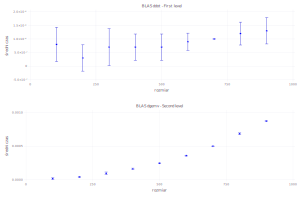

In [40]:
# stack vertically
draw(SVGJS(30cm, 20cm), vstack(first_plot, second_plot))

In [41]:
draw(PNG("wyniki.png", 30cm, 20cm), vstack(first_plot, second_plot))